In [1]:
import os
import igraph as ig
import matplotlib.pyplot as plt

ig.config["plotting.backend"] = "matplotlib"

root_path = r'C:\\Users\\corts\\Documents'

In [2]:
dirs_to_avoid = (
    'C:\\\\Users\\\\corts\\\\Documents\\R\\win-library',
    'C:\\\\Users\\\\corts\\\\Documents\\Universitat\\Màster\\1r Semestre\\Software Construction',
    'C:\\\\Users\\\\corts\\\\Documents\\Universitat\\Màster\\2n Semestre\\Softwarepraktikum'
)

In [3]:
# create the lists that define the graph
nodes = []
edges = []
levels = []
sizes = []

In [4]:
def add_to_graph(curr_dir, parent_dir, level, size):
    # add node and attributes to the lists
    nodes.append(str(curr_dir))
    levels.append(level)
    sizes.append(size)
    if level > 0:
        # does not apply for the root
        edges.append((str(curr_dir), str(parent_dir)))

In [5]:
def visit_immediate_subdirectories(curr_dir, parent_dir, level):
    elements = [os.path.join(curr_dir, subdir) for subdir in os.listdir(curr_dir) 
                if os.path.join(curr_dir, subdir) not in dirs_to_avoid]
    
    size = 0
    
    for element in elements:
        if os.path.isdir(element):
            # if it's a directory, visit it and get its size
            try:
                # not the best separation of concerns, I know
                size = size + visit_immediate_subdirectories(element, curr_dir, level + 1)
            except Exception as e:
                # lacking permissions, just skip
                pass 
        else:
            # if it's a file, get its size
            size = size + os.path.getsize(element)
    
    # append data to the graph lists
    add_to_graph(curr_dir, parent_dir, level, size)
    
    return size

In [6]:
# launch the walk
max_size = visit_immediate_subdirectories(root_path, None, 0)

In [7]:
vertex_sizes = [size/max_size for size in sizes]
vertex_labels = [node.split('\\')[-1] if level < 2 else None for node, level in zip(nodes, levels)]

In [8]:
print('Node count:', len(nodes))
print('Edge count:', len(edges))
print('Is a tree?', len(nodes) - 1 == len(edges))

Node count: 1785
Edge count: 1784
Is a tree? True


In [9]:
# create graph
g = ig.Graph()
g.add_vertices(nodes)
g.add_edges(edges)

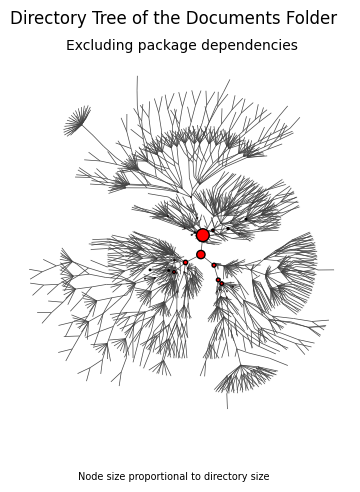

In [10]:
ig.plot(g, 
        edge_width = 0.5,
        vertex_size = [2*size for size in vertex_sizes],
        #vertex_label = vertex_labels,
        #vertex_label_size = 5,
        bbox = (0, 0, 500, 500), 
        layout = g.layout('kamada_kawai'))

plt.suptitle('Directory Tree of the Documents Folder')
plt.title('Excluding package dependencies', fontsize = 'medium')

plt.figtext(0.5, 0, 'Node size proportional to directory size', ha = 'center', fontsize = 7)

plt.savefig('directories_kamada.pdf')
plt.show()